### DATA SOURCE: Sendy Logistics Challenge

## Loading Modules

In [2]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import mpl_toolkits
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
import time

## Loading Datasets

In [3]:
train = pd.read_csv('train.csv')
riders = pd.read_csv('Riders.csv')
test = pd.read_csv('Test.csv')

## Analysis of the train dataset

In [4]:
train.shape

(21201, 29)

* This dataset has 21201 rows and 26 columns

In [5]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

* Describing training dataset

In [7]:
train.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


* Description of the categorical data

In [8]:
train.describe(include=['O'])

,Order No,User Id,Vehicle Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time,Rider Id
count,21201,21201,21201,21201,21201,21201,21201,21201,21201,21201
unique,21201,3186,1,2,15686,15742,15767,15690,15725,924
top,Order_No_19434,User_Id_393,Bike,Business,9:41:03 AM,9:56:52 AM,2:32:04 PM,12:04:20 PM,3:24:03 PM,Rider_Id_726
freq,1,645,21201,17384,6,6,6,6,7,247


###  Data Cleaning

* Lets drop the columns we dont need

In [9]:
train.drop(['Order No','User Id','Vehicle Type'],axis = 1,inplace = True)

* Convert the personal or business column to numerical

In [10]:
train['Personal or Business'].value_counts()

Business    17384
Personal     3817
Name: Personal or Business, dtype: int64

In [11]:
p_b = {'Personal':1,'Business':0}
train['Personal or Business'] = train['Personal or Business'].map(p_b)

### Checking for missing values

In [12]:
train.isnull().sum()

Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time                    0
Distance (KM)                                    0
Temperature                                   4366
Precipitation in millimeters   

* Conclusion : Precipitaion and Temperature are missing values

* Drop the precipitaion column since it is missing more than 3 quaters of the values and fill missing values in Temperature col

In [13]:
train['Temperature'].fillna(train['Temperature'].mean(),inplace=True)

In [14]:
train.drop(['Precipitation in millimeters'],axis=1,inplace=True)

## Analysis of feature vs Target variable

###  Platform Type vs Time from Pickup to Arrival

In [15]:
train.groupby('Platform Type')['Time from Pickup to Arrival'].value_counts()

Platform Type  Time from Pickup to Arrival
1              1240                           6
               857                            5
               879                            5
               1144                           5
               1241                           5
               1360                           5
               1369                           5
               1390                           5
               1506                           5
               1522                           5
               701                            4
               704                            4
               737                            4
               832                            4
               894                            4
               900                            4
               904                            4
               916                            4
               972                            4
               1026                          

In [16]:
train[['Platform Type', 'Time from Pickup to Arrival']].groupby(['Platform Type'], as_index=False).mean()

,Platform Type,Time from Pickup to Arrival
0,1,1572.799721
1,2,1540.861224
2,3,1555.773402
3,4,1675.150000


In [17]:
#platform 2 has the lowest average time from pickup to arrival

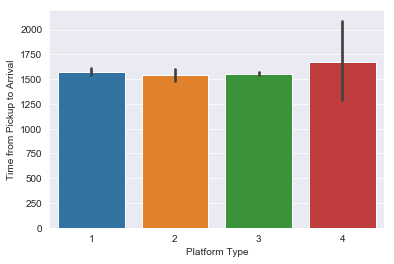

In [18]:
sns.barplot(x='Platform Type', y='Time from Pickup to Arrival', data=train)

### Personal or Business vs Time from Pickup to Arrival

In [19]:
train['Personal or Business'].value_counts()

0    17384
1     3817
Name: Personal or Business, dtype: int64

In [20]:
train[['Personal or Business', 'Time from Pickup to Arrival']].groupby(['Personal or Business'], as_index=False).mean()

,Personal or Business,Time from Pickup to Arrival
0,0,1550.743270
1,1,1585.056327


In [21]:
#business orders have a lower pickup to arrival time

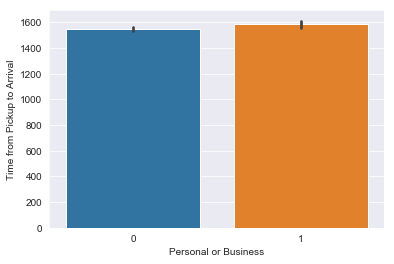

In [22]:
sns.barplot(x='Personal or Business', y='Time from Pickup to Arrival', data=train)

### Platform Type & Personal or Business vs Time from Pickup to Arrival

Personal or Business      0     1
Platform Type                    
1                       317  1830
2                        63   917
3                     16984  1070
4                        20     0


Text(0, 0.5, 'Percentage')

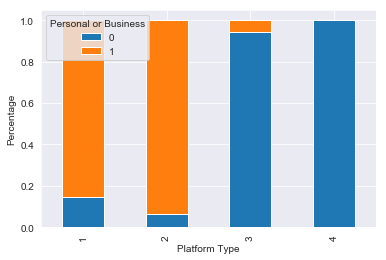

In [23]:
tab = pd.crosstab(train['Platform Type'], train['Personal or Business'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Platform Type')
plt.ylabel('Percentage')

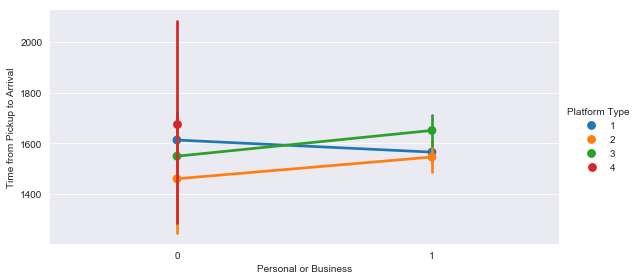

In [24]:
sns.factorplot('Personal or Business', 'Time from Pickup to Arrival', hue='Platform Type', size=4, aspect=2, data=train)

###  Distance (KM) vs Time from Pickup to Arrival

In [25]:
train[['Distance (KM)', 'Time from Pickup to Arrival']].groupby(['Distance (KM)'], as_index=False).mean()

,Distance (KM),Time from Pickup to Arrival
0,1,510.019544
1,2,594.731169
2,3,796.038704
3,4,867.362388
4,5,1136.404873
5,6,1258.939166
6,7,1401.198565
7,8,1492.921439
8,9,1575.961722
9,10,1634.632530


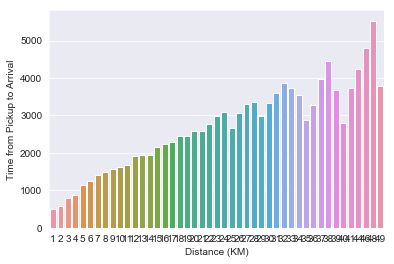

In [26]:
sns.barplot(x='Distance (KM)', y='Time from Pickup to Arrival', ci=None, data=train) # ci=None will hide the error bar

### Temperature vs Time from Pickup to Arrival

In [27]:
train.Temperature.value_counts()

23.258889    4366
24.700000     201
22.400000     196
23.800000     195
23.700000     191
24.600000     189
23.600000     188
25.200000     184
22.500000     183
27.300000     179
24.800000     178
24.500000     178
23.900000     177
24.000000     177
25.300000     175
24.900000     173
24.200000     170
24.400000     169
25.500000     168
25.400000     168
25.000000     168
25.600000     166
21.300000     166
21.200000     166
26.300000     163
23.200000     162
22.300000     161
22.100000     161
22.600000     160
27.500000     160
             ... 
30.100000      18
30.000000      18
15.000000      17
15.800000      16
30.400000      16
14.400000      16
15.700000      15
15.900000      13
30.300000      13
14.900000      13
14.600000      11
14.300000       9
14.200000       7
14.100000       6
31.800000       6
13.600000       6
13.300000       6
31.300000       6
13.700000       5
13.200000       5
13.400000       5
13.500000       4
32.100000       4
31.700000       3
13.900000 

In [28]:
train[['Temperature', 'Time from Pickup to Arrival']].groupby(['Temperature'], as_index=False).mean()

,Temperature,Time from Pickup to Arrival
0,11.2,1046.000000
1,13.2,1546.800000
2,13.3,1683.833333
3,13.4,768.800000
4,13.5,2105.000000
5,13.6,814.666667
6,13.7,2986.400000
7,13.8,2253.000000
8,13.9,1255.000000
9,14.0,1344.000000


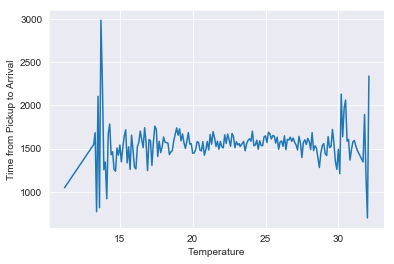

In [29]:
sns.lineplot(x='Temperature', y='Time from Pickup to Arrival', ci=None, data=train) # ci=None will hide the error bar

## Exloration of the above variables vs the target using featexp module

In [30]:
from featexp import get_univariate_plots

                                       Plots for Platform Type                                        


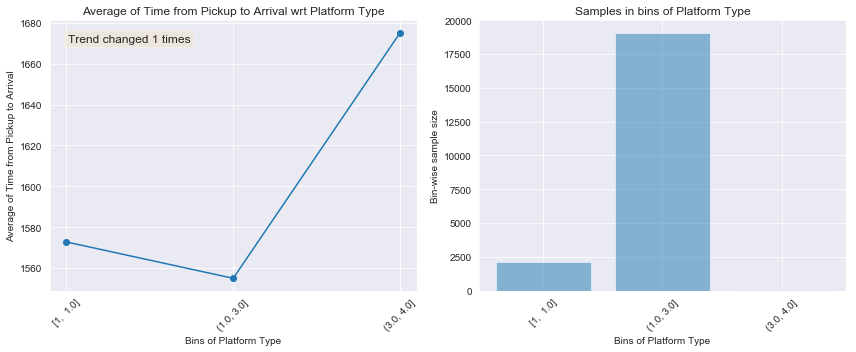

--------------------------------------------------------------------------------------------------------------


                                    Plots for Personal or Business                                    


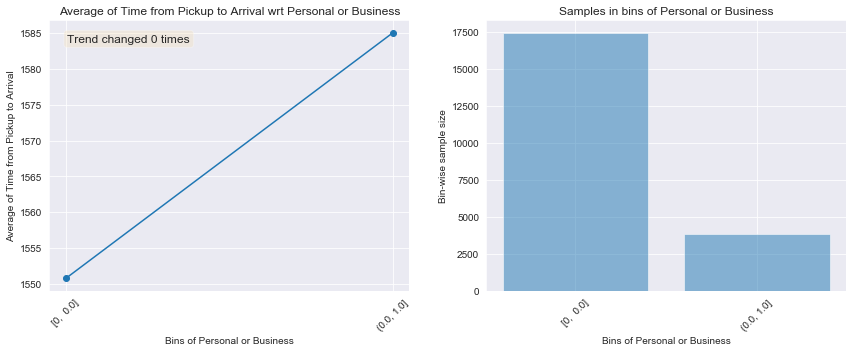

--------------------------------------------------------------------------------------------------------------


                                       Plots for Distance (KM)                                        


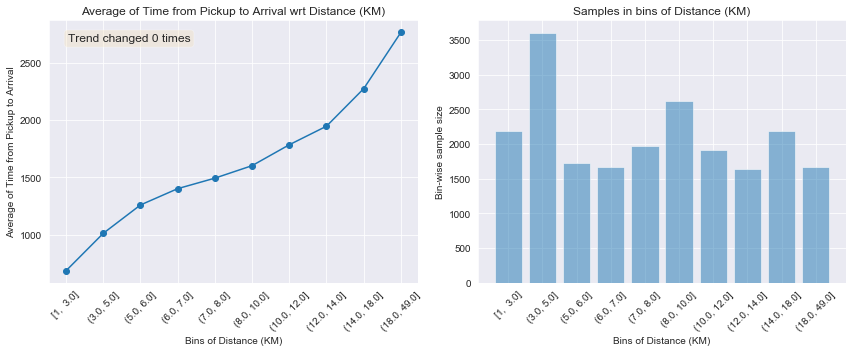

--------------------------------------------------------------------------------------------------------------




In [31]:
get_univariate_plots(data = train, target_col= 'Time from Pickup to Arrival',features_list=['Platform Type','Personal or Business',
                                                                                            'Distance (KM)'])



### Correlation

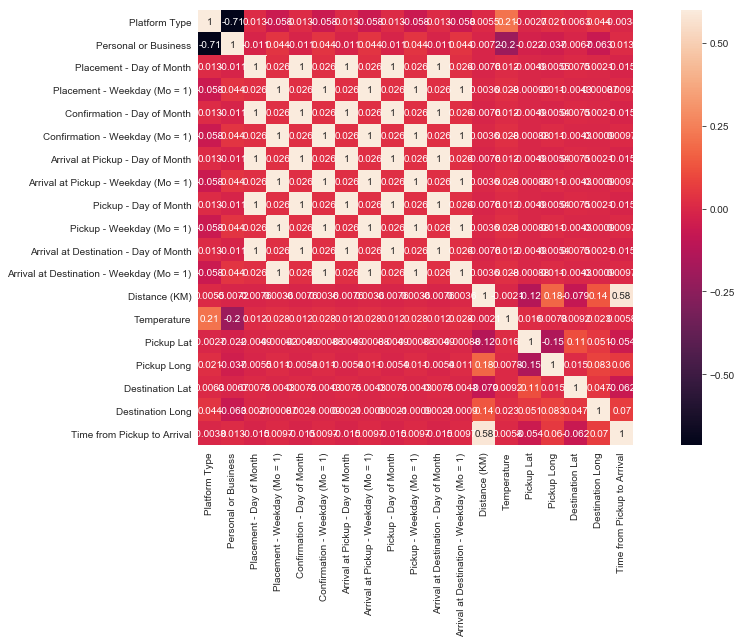

In [32]:
plt.figure(figsize=(17,8))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

## Feature Extraction

*  select the appropriate features to train our regression model

### Analysis of the riders dataset

In [33]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


* Drop the Age and No of rating COLUMNS

In [34]:
riders.drop('No_of_Ratings',axis=1,inplace=True)

In [35]:
riders.drop('Age',axis=1,inplace=True)

#### Merge the rider df with the train data

In [36]:
train = pd.merge(train, riders, how='left', left_on='Rider Id', right_on='Rider Id', left_index=True)
test = pd.merge(test, riders, how='left', left_on='Rider Id', right_on='Rider Id', left_index=True)

In [37]:
train.head().T

,27,739,851,806,159
Platform Type,3,3,3,3,1
Personal or Business,0,1,0,0,1
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1
Confirmation - Time,9:40:10 AM,11:23:21 AM,12:42:44 PM,9:26:05 AM,9:56:18 AM
Arrival at Pickup - Day of Month,9,12,30,15,13
Arrival at Pickup - Weekday (Mo = 1),5,5,2,5,1


In [38]:
train.reset_index(drop=True, inplace=True)

* Dealing with the time columns, lets convert to 24 hour clock system

In [39]:
time_data =[col for col in train.columns if col.endswith('Time')]

In [40]:
time_ = train[time_data]

In [41]:
import datetime as dt
def convert_to_24hrs(time_):
    for col in time_.columns:
        if col.endswith("Time"):
            time_[col] = pd.to_datetime(time_[col], format='%I:%M:%S %p').dt.strftime("%H:%M:%S")
    return time_

time_= convert_to_24hrs(time_)

* Label encode the columns

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
time_.head()

,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Time
0,09:35:46,09:40:10,10:04:47,10:27:30,10:39:55
1,11:16:16,11:23:21,11:40:22,11:44:09,12:17:22
2,12:39:25,12:42:44,12:49:34,12:53:03,13:00:38
3,09:25:34,09:26:05,09:37:56,09:43:06,10:05:27
4,09:55:18,09:56:18,10:03:53,10:05:23,10:25:37


In [44]:
train.drop(time_,axis=1,inplace=True)

* Convert the rider_id column to numerical

In [45]:
train['Rider Id']= le.fit_transform(train['Rider Id']) 

In [46]:
train.dtypes

Platform Type                                  int64
Personal or Business                           int64
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Distance (KM)                                  int64
Temperature                                  float64
Pickup Lat                                   float64
Pickup Long                                  float64
Destination Lat                              float64
Destination Long                             float64
Rider Id                                      

#### Conclusion : Our training dataset is clean

### Analysis of the  Testing dataset

In [48]:
test.head().T

,183,826,650,561,203
Order No,Order_No_19248,Order_No_12736,Order_No_768,Order_No_15332,Order_No_21373
User Id,User_Id_3355,User_Id_3647,User_Id_2154,User_Id_2910,User_Id_1205
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,3
Personal or Business,Business,Business,Business,Business,Business
Placement - Day of Month,27,17,27,17,11
Placement - Weekday (Mo = 1),3,5,4,1,2
Placement - Time,4:44:10 PM,12:57:35 PM,11:08:14 AM,1:51:35 PM,11:30:28 AM
Confirmation - Day of Month,27,17,27,17,11
Confirmation - Weekday (Mo = 1),3,5,4,1,2


In [54]:
test.shape 

(7068, 23)

* Cleaning the dataset

In [55]:
p_b = {'Personal':1,'Business':0}
test['Personal or Business'] = test['Personal or Business'].map(p_b)

In [57]:
test.drop(['Order No','User Id','Vehicle Type','Precipitation in millimeters'],axis=1,inplace=True)

In [58]:
test['Temperature'].fillna(test['Temperature'].mean(),inplace=True)

In [59]:
test.reset_index(drop=True, inplace=True)

In [60]:

def convert_to_24hrs(test):
    for col in test.columns:
        if col.endswith("Time"):
            test[col] = pd.to_datetime(test[col], format='%I:%M:%S %p').dt.strftime("%H:%M:%S")
    return test

test= convert_to_24hrs(test)

In [61]:
time_d=[col for col in test.columns if col.endswith('Time')]

In [62]:
test.drop(test[time_d],inplace=True,axis=1)

In [63]:
test['Rider Id']= le.fit_transform(test['Rider Id']) 

In [64]:
train.columns

Index(['Platform Type', 'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'Time from Pickup to Arrival',
       'No_Of_Orders', 'Average_Rating'],
      dtype='object')

## Machine Learning Models - Training


### Feature Scaling

In [65]:
train.columns

Index(['Platform Type', 'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'Time from Pickup to Arrival',
       'No_Of_Orders', 'Average_Rating'],
      dtype='object')

* Arrange the columns, the y-variable is at the end

In [66]:
train = train.reindex(columns=['Platform Type', 'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month',
       'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id','No_Of_Orders', 'Average_Rating','Time from Pickup to Arrival'])


In [67]:
train.head().T

,0,1,2,3,4
Platform Type,3.000000,3.000000,3.000000,3.000000,1.000000
Personal or Business,0.000000,1.000000,0.000000,0.000000,1.000000
Placement - Day of Month,9.000000,12.000000,30.000000,15.000000,13.000000
Placement - Weekday (Mo = 1),5.000000,5.000000,2.000000,5.000000,1.000000
Confirmation - Day of Month,9.000000,12.000000,30.000000,15.000000,13.000000
Confirmation - Weekday (Mo = 1),5.000000,5.000000,2.000000,5.000000,1.000000
Arrival at Pickup - Day of Month,9.000000,12.000000,30.000000,15.000000,13.000000
Arrival at Pickup - Weekday (Mo = 1),5.000000,5.000000,2.000000,5.000000,1.000000
Pickup - Day of Month,9.000000,12.000000,30.000000,15.000000,13.000000
Pickup - Weekday (Mo = 1),5.000000,5.000000,2.000000,5.000000,1.000000


## Feature Selection

In [68]:
X = train.iloc[:,0:-2]

In [69]:
X.shape

(21201, 20)

In [70]:
y = train.iloc[:,-1]

In [71]:
y.shape

(21201,)

### Split the data for training

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### K Nearest Neighbors

In [70]:
knn = KNeighborsRegressor()

training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
y_pred = knn.predict(X_test)
prediction_end = time.perf_counter()

mse = mean_squared_error(y_test,y_pred)
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start

print("Knn root mean squared error:{} ".format(mse**0.5))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %6.5f seconds" % (knn_prediction_time))

Knn root mean squared error:927.906653258315 
Time consumed for training: 0.175 seconds
Time consumed for prediction: 0.08469 seconds


### Results:
        * the KNN model performed poorly,the rmse is too high

### Random Forest Regressor

In [71]:
rfr = RandomForestRegressor(n_estimators=10)

training_start = time.perf_counter()
rfr.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = rfr.predict(X_test)
prediction_end = time.perf_counter()

mse = mean_squared_error(y_test,preds)
train_time = training_end-training_start
prediction_time = prediction_end-prediction_start

print("Random forest Mean squared error: {}".format(mse**0.5))
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

Random forest Mean squared error: 839.0856983604219
Time consumed for training: 3.390 seconds
Time consumed for prediction: 0.02289 seconds


### Result:'
    * Random Forest performed better thn Knn but the Mean squared error is still too high

### Support Vector Regressor

In [72]:
svr = SVR()

training_start = time.perf_counter()
svr.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = svr.predict(X_test)
prediction_end = time.perf_counter()
mse = mean_squared_error (y_test,preds)

train_time = training_end-training_start
prediction_time = prediction_end-prediction_start
print("Mean squared error:{} ".format(mse**0.5))
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

Mean squared error:1031.246248938359 
Time consumed for training: 43.582 seconds
Time consumed for prediction: 8.77024 seconds


### Result :
    * Performed worse than both KNN and Random Forest

## Linear regression

In [76]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

training_start = time.perf_counter()
lreg.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = lreg.predict(X_test)
prediction_end = time.perf_counter()
mse = mean_squared_error (y_test,preds)

train_time = training_end-training_start
prediction_time = prediction_end-prediction_start
print("Mean squared error:{} ".format(mse**0.5))
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

Mean squared error:823.3083267165425 
Time consumed for training: 1.396 seconds
Time consumed for prediction: 0.01095 seconds


## XGBOOST

In [80]:
xgb = XGBRegressor()

training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
mse = mean_squared_error (y_test,preds)

train_time = training_end-training_start
prediction_time = prediction_end-prediction_start
print("Mean squared error:{} ".format(mse**0.5))
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

[21:54:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean squared error:796.1539974129873 
Time consumed for training: 1.993 seconds
Time consumed for prediction: 0.02088 seconds


#### Conclusion: Performed better than any of the previous models

In [86]:
import  lightgbm as lgbm
lgb =lgbm.LGBMRegressor()

training_start = time.perf_counter()
lgb.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = lgb.predict(X_test)
prediction_end = time.perf_counter()
mse = mean_squared_error (y_test,preds)

train_time = training_end-training_start
prediction_time = prediction_end-prediction_start
print("Mean squared error:{} ".format(mse**0.5))
print("Time consumed for training: %4.3f seconds" % (train_time))
print("Time consumed for prediction: %6.5f seconds" % (prediction_time))

Mean squared error:784.0823191832701 
Time consumed for training: 0.656 seconds
Time consumed for prediction: 0.03246 seconds


### Conclusion: Perfomed best

## Optimization of hyperparameters

In [92]:
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import  lightgbm as lgb
from sklearn.model_selection import cross_val_score, learning_curve

rs = 3
kfold = KFold(n_splits=10, random_state=rs, shuffle=True)

regressors = []
regressors.append(SVR())
regressors.append(GradientBoostingRegressor(random_state=rs))
regressors.append(ExtraTreesRegressor(n_estimators=rs))
regressors.append(RandomForestRegressor(random_state=rs))
regressors.append(xgb.XGBRegressor(random_state=rs, objective="reg:squarederror"))
regressors.append(lgb.LGBMRegressor(random_state=rs))

cv_results = []
for regressor in regressors:     #scores to be minimised are negated (neg)
    cv_results.append(np.sqrt(abs(cross_val_score(regressor, X_train, y=y_train, scoring='neg_mean_squared_error', cv=kfold))))

cv_means = []
cv_stds = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_stds.append(cv_result.std())
    
cv_res = pd.DataFrame({ 
    "Algorithm": ["SVR", "GBR", "EXR", "RFR", "XGBR", "LGBM"],
    "CrossValMeans": cv_means, "CrossValErrors": cv_stds
                       })
cv_res = cv_res.sort_values("CrossValMeans", ascending=True)
print(cv_res)

  Algorithm  CrossValMeans  CrossValErrors
5      LGBM     751.266685       26.729380
4      XGBR     764.791298       28.640995
1       GBR     765.368424       28.768288
3       RFR     812.604856       23.040332
2       EXR     920.856168       21.337081
0       SVR     998.662220       29.656257
